In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Análise de dados dos pinquins

In [2]:
df = sns.load_dataset('penguins')
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [3]:
df.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [4]:
df = df.dropna()

In [5]:
df.shape

(333, 7)

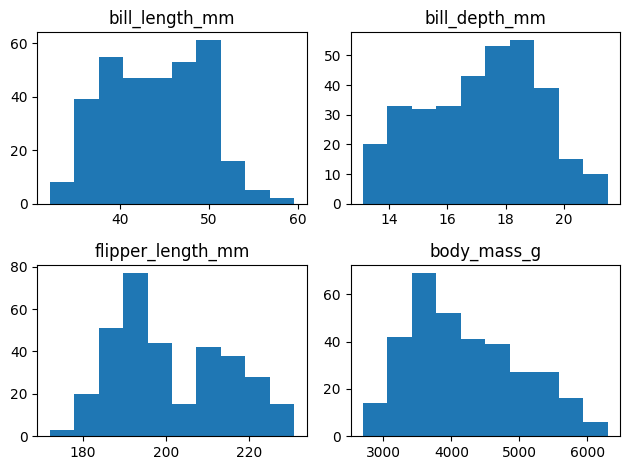

In [36]:
df.hist(grid=False)
plt.tight_layout();

In [43]:
df['body_mass_g'].mean(), df['body_mass_g'].median()

(4207.057057057057, 4050.0)

In [48]:
print(f"Média de massa corporal:   {df['body_mass_g'].mean().round(2)} \nMediana de massa corporal: {df['body_mass_g'].median().round(2)}")

Média de massa corporal:   4207.06 
Mediana de massa corporal: 4050.0


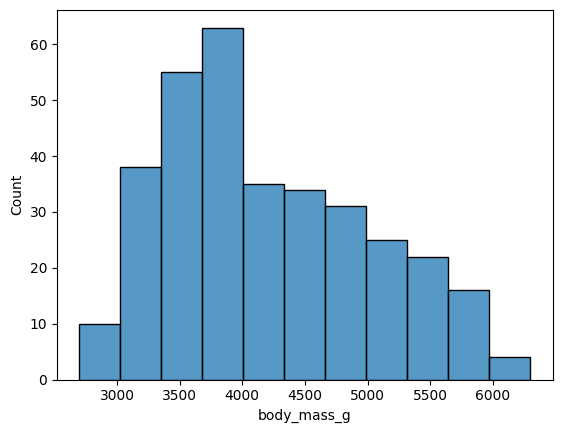

In [8]:
sns.histplot(data=df, x='body_mass_g');

In [9]:
(
    df
    .groupby('species')['body_mass_g']
    .describe()
    .astype(int)
    .sort_values('mean')
)

,count,mean,std,min,25%,50%,75%,max
species,,,,,,,,
Adelie,146,3706,458,2850,3362,3700,4000,4775
Chinstrap,68,3733,384,2700,3487,3700,3950,4800
Gentoo,119,5092,501,3950,4700,5050,5500,6300


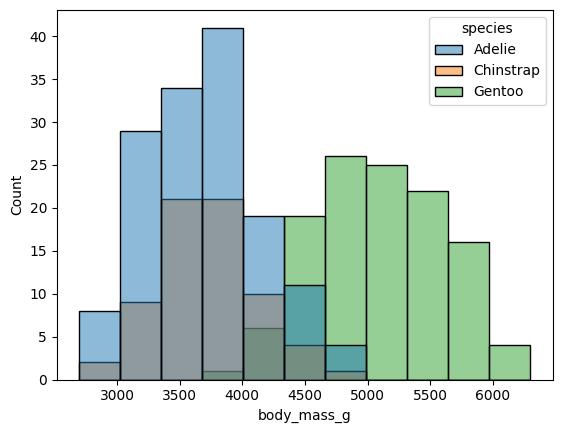

In [10]:
sns.histplot(data=df, x='body_mass_g', hue='species');

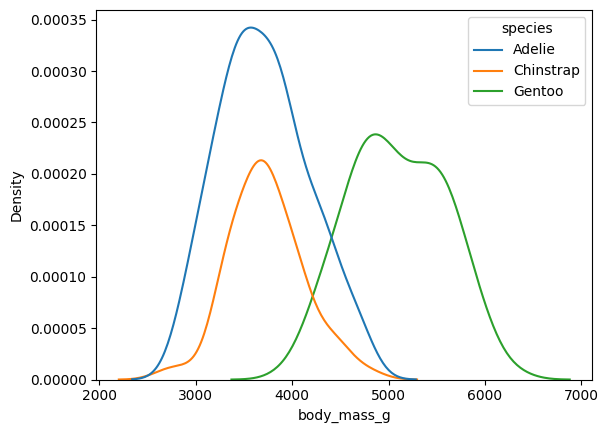

In [11]:
sns.kdeplot(data=df, x='body_mass_g', hue='species');

In [12]:
df['bill_length_mm'].var()

29.906333441875603

In [49]:
df['bill_depth_mm'].var()

3.877888309996744

In [51]:
df['flipper_length_mm'].var().round(2)

196.44

In [52]:
df['body_mass_g'].var().round(2)

648372.49

In [13]:
df.select_dtypes('float').cov()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,29.906333,-2.462091,50.058195,2595.623304
bill_depth_mm,-2.462091,3.877888,-15.947248,-748.456122
flipper_length_mm,50.058195,-15.947248,196.441677,9852.191649
body_mass_g,2595.623304,-748.456122,9852.191649,648372.487699


In [54]:
print('Arrendondando para 2 casas decimais')
df.select_dtypes('float').cov().round(2)

Arrendondando para 2 casas decimais


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,29.91,-2.46,50.06,2595.62
bill_depth_mm,-2.46,3.88,-15.95,-748.46
flipper_length_mm,50.06,-15.95,196.44,9852.19
body_mass_g,2595.62,-748.46,9852.19,648372.49


In [14]:
df.select_dtypes('float').corr()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,-0.228626,0.653096,0.589451
bill_depth_mm,-0.228626,1.000000,-0.577792,-0.472016
flipper_length_mm,0.653096,-0.577792,1.000000,0.872979
body_mass_g,0.589451,-0.472016,0.872979,1.000000


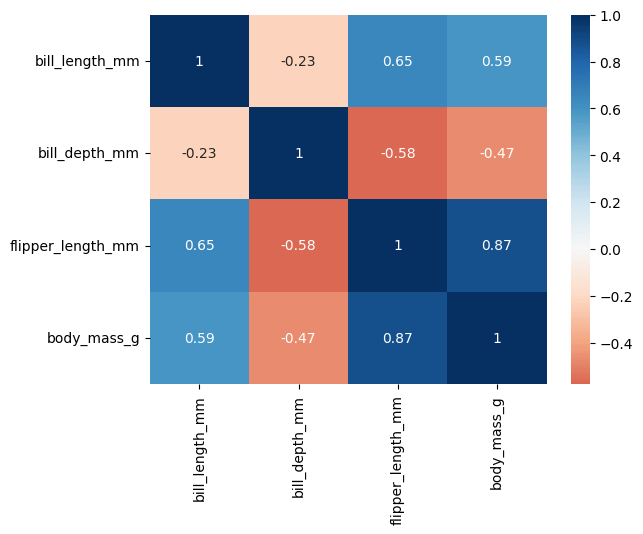

In [15]:
sns.heatmap(
    df.select_dtypes('float').corr(method='pearson'),
    annot=True, cmap='RdBu', center=0
);

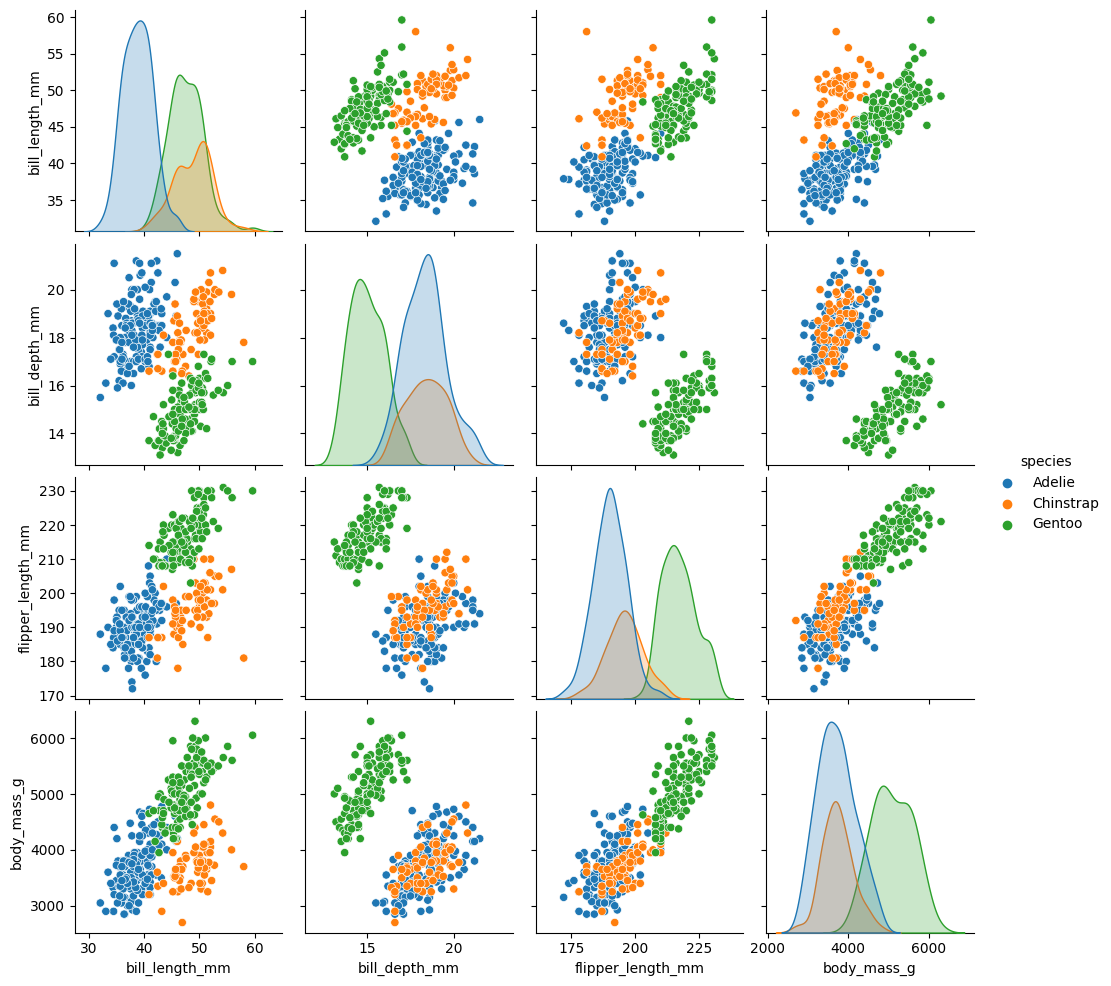

In [16]:
sns.pairplot(df, hue='species');

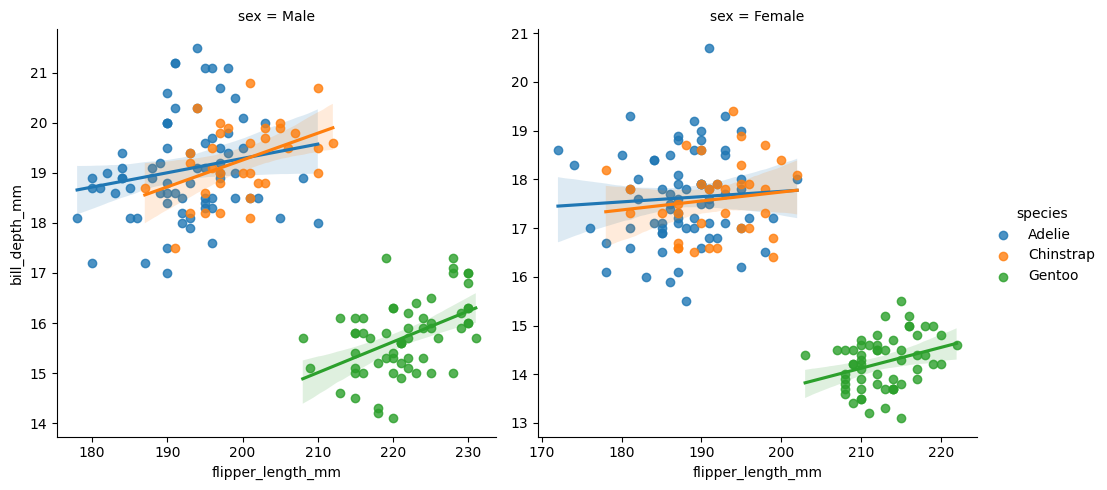

In [59]:
sns.lmplot(data=df, x='flipper_length_mm', y='bill_depth_mm', hue='species', col="sex", 
          facet_kws=dict(sharex=False, sharey=False));

In [18]:
df_gentoo = df[df['species']=='Gentoo']

In [61]:
df_gentoo.select_dtypes(include='float').corr().round(3)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000,0.654,0.664,0.667
bill_depth_mm,0.654,1.000,0.711,0.723
flipper_length_mm,0.664,0.711,1.000,0.711
body_mass_g,0.667,0.723,0.711,1.000


In [63]:
df_gentoo.select_dtypes(include='float').corr(method='spearman').round(3)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000,0.652,0.659,0.684
bill_depth_mm,0.652,1.000,0.703,0.760
flipper_length_mm,0.659,0.703,1.000,0.727
body_mass_g,0.684,0.760,0.727,1.000


## Análise de dados do Titanic

In [21]:
dft = sns.load_dataset('titanic')

In [22]:
dft.dtypes.unique()

array([dtype('int64'), dtype('O'), dtype('float64'),
       CategoricalDtype(categories=['First', 'Second', 'Third'], ordered=False),
       dtype('bool'),
       CategoricalDtype(categories=['A', 'B', 'C', 'D', 'E', 'F', 'G'], ordered=False)],
      dtype=object)

In [23]:
cols_cont = dft.select_dtypes('float64').columns
cols_cont

Index(['age', 'fare'], dtype='object')

## Informe a média, mediana e desvio padrão dessas variáveis

In [64]:
dft[cols_cont].describe().round(3)

,age,fare
count,714.000,891.000
mean,29.699,32.204
std,14.526,49.693
min,0.420,0.000
25%,20.125,7.910
50%,28.000,14.454
75%,38.000,31.000
max,80.000,512.329


### Informe o histograma e gráfico de dispersão dessas variáveis

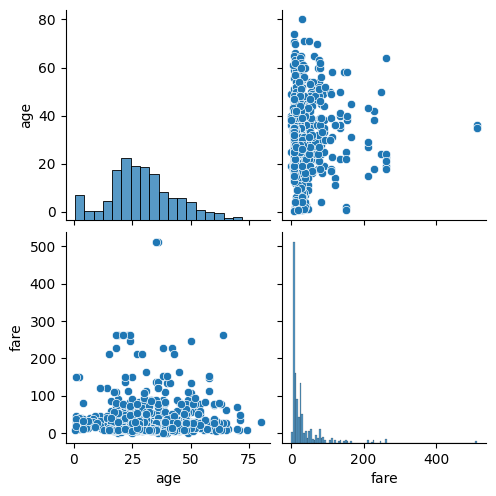

In [26]:
sns.pairplot(dft[cols_cont]);

### Verifique a covariância e correlação de pearson entre as variáveis

In [27]:
dft[cols_cont].cov()

,age,fare
age,211.019125,73.849030
fare,73.849030,2469.436846


In [28]:
dft[cols_cont].corr()

,age,fare
age,1.000000,0.096067
fare,0.096067,1.000000


## Informe as variáveis numéricas contínuas e categóricas ordinais em uma 

*   Item da lista

lista e atribua a uma variável `cols_ord`

In [29]:
cols_ord = dft.select_dtypes(include=['float', 'int']).columns
cols_ord

Index(['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare'], dtype='object')

## Verifique a correlação de spearman entre as variáveis

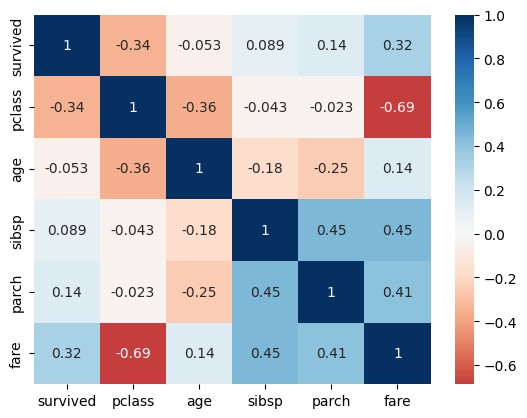

In [31]:
sns.heatmap(
    dft[cols_ord].corr('spearman'),
    annot=True, cmap='RdBu', center=0
);

## Boxplot de idade para cada class

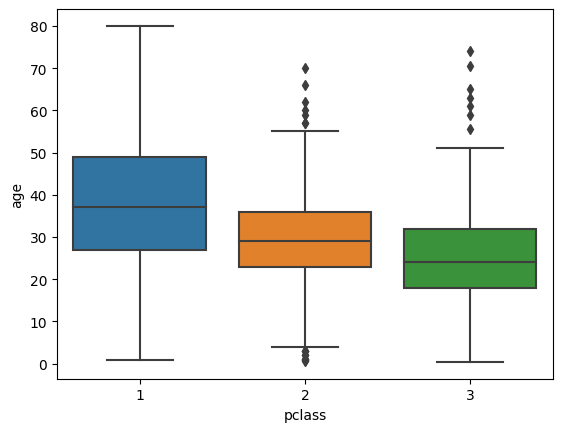

In [33]:
sns.boxplot(data=dft, x='pclass', y='age');

## Boxplot de tarifa para cada class

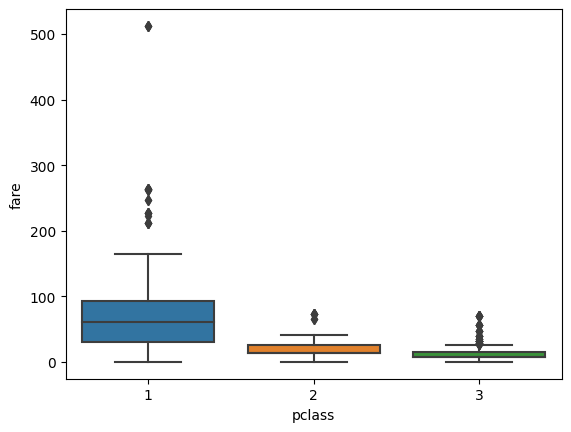

In [35]:
sns.boxplot(data=dft, x='pclass', y='fare');